# Tarea para diplomado en machine learning

#Pregunta 1: Twitter Sentiment Analysis

## a partir de set de datos de tweets, crear un predictor de sentiminetos  para frases, basado en knn

In [ ]:
import numpy as np
import pandas as pd
import string

from sklearn.model_selection import train_test_split
from sklearn import metrics, neighbors
import matplotlib.pyplot as plt


In [ ]:
# 1. construir/cargar vocabulario de palabras con sentimiento
# a) cargar los archivos del sitio en la carpeta data. usar los botones para subir archivos


vocab =pd.read_csv('train.csv')

In [ ]:
vocab.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
vocab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
vocab.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
#se busca predecir si es mensaje de odio (racista/sexista) o no

## 1.a) construir un  predictor de odio

In [ ]:
X=vocab['tweet']
Y=vocab['label']

In [ ]:
X.shape, Y.shape

((31962,), (31962,))

In [ ]:
X.head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

In [ ]:
#Primero armar el espacio semántico de carcaterísticas

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [ ]:
#distribucion porcentual de clases en set de test
Y_test.value_counts()/Y_test.count()

0    0.941195
1    0.058805
Name: label, dtype: float64

In [ ]:
#distribucion porcentual de clases en set de train
Y_train.value_counts()/Y_train.count()

0    0.928594
1    0.071406
Name: label, dtype: float64

In [ ]:
#por instruccion del profesor , se trabaja con test y train solo con el archivo de train original
XX_train, XX_test, YY_train, YY_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=0)

In [ ]:
XX_train.head()

25915    what are you   about today? #celebrate #lulybt...
14435    i just find myself   with the simple things. #...
22586     @user @user @user oh, yes..it's all so #heawa...
20471     @user #prayfororlando  #orlandoshooting #orla...
27380    if you are pa of the 64.2 mil who rejected #pu...
Name: tweet, dtype: object

In [ ]:
YY_train.head()

25915    0
14435    0
22586    0
20471    0
27380    1
Name: label, dtype: int64

In [ ]:
YY_train.shape

(21573,)

In [ ]:
#~1500 de los 21.000 tweets son de odio en el set de train
YY_train[YY_train==1].shape


(1553,)

In [ ]:
# qué indices son de odio
YY_train[YY_train==1].index

Int64Index([27380,  7511, 19056, 30397,  8568, 22934,  1366, 25620, 27479,
              933,
            ...
            16446, 21550, 16264,  4177,  3354, 12560, 19541, 22925, 19744,
             9882],
           dtype='int64', length=1553)

In [ ]:
XX_train_malo=XX_train.filter(items=list(YY_train[YY_train==1].index), axis=0)
#me quedo con los indices de XX donde sus Y son =1

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# se arma una bolsa de palabras malas
bad_words=pd.Series(name='word', data=[])
for i in range(XX_train_malo.shape[0]):
  d=XX_train_malo.iloc[i]
  d=d.split()
  s=pd.Series(name='word', data=d)
  bad_words=bad_words.append(s)



In [ ]:
bad_words.value_counts().iloc[50:150]

.            53
just         53
libtard      52
but          52
was          52
             ..
call         18
want         17
thanks       17
.@user       17
#malevote    17
Name: word, Length: 100, dtype: int64

In [ ]:
bad_df=pd.DataFrame(bad_words.value_counts())
bad_df.head()

,word
@user,1256
the,542
a,443
to,372
of,318


In [ ]:
bad_df.reset_index(inplace=True)

In [ ]:
bad_df.head()

,index,word
0,@user,1256
1,the,542
2,a,443
3,to,372
4,of,318


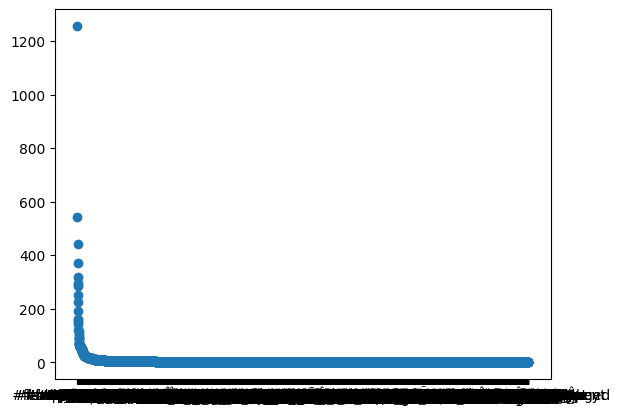

In [ ]:
# distribucion de frecuencia de las palabras malas
plt.scatter(bad_df['index'], bad_df['word'])
plt.show()

In [ ]:
# se hace mismo procedimiento en tweets buenos
XX_train_bueno=XX_train.filter(items=list(YY_train[YY_train==0].index), axis=0)

In [ ]:
good_words=pd.Series(name='word', data=[])
for i in range(XX_train_bueno.shape[0]):
  d=XX_train_bueno.iloc[i]
  d=d.split()
  s=pd.Series(name='word', data=d)
  good_words=good_words.append(s)

In [ ]:
good_words.shape

(262081,)

In [ ]:
good_df=pd.DataFrame(good_words.value_counts())
good_df.head()

,word
@user,10326
the,6266
to,6246
i,3744
a,3738


In [ ]:
good_df.reset_index(inplace=True)

In [ ]:
good_df['percentage of total']=good_df['word']/good_df.word.sum()

In [ ]:
good_df['aggregate percentage']=0

In [ ]:
good_df['percentage of total'][0:2].sum()

0.06330867174652112

In [ ]:
good_df.shape[0]

48147

In [ ]:
for i in range(good_df.shape[0]):
  good_df.iloc[i, 3]=good_df['percentage of total'][0:i+1].sum()

In [ ]:
#distribucion porcentual de las buenas palabras
good_df.head()

,index,word,percentage of total,aggregate percentage
0,@user,10326,0.039400,0.039400
1,the,6266,0.023909,0.063309
2,to,6246,0.023832,0.087141
3,i,3744,0.014286,0.101427
4,a,3738,0.014263,0.115689


In [ ]:
good_df[good_df['aggregate percentage']<0.5].shape

(269, 4)

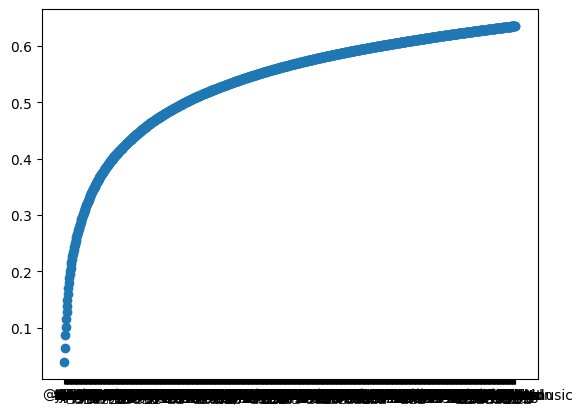

In [ ]:
plt.scatter(good_df['index'][0:1000], good_df['aggregate percentage'][0:1000])
plt.show()

In [ ]:
#tomamos como criterio eliminar del conjunto de palabras malas,
#a las que también estén en el top 50% de las palabras buenas
#(palabras que se encuentren hasta el percentil 50 del ranking de palabras más frecuentes)

In [ ]:
# son 269 palabras distintas las que acumulan el 50% de la frecuencia de buenas palabras (~48.000 palabras hay en los tweets catalogados como 'buenos')
# de la bolsa de malas palabras, queremos eliminar las que estén en este listado encontado
bad_words_list=[]
for i in range(good_df[good_df['aggregate percentage']<0.5].shape[0]):
  bad_words_list.append(good_df[good_df['aggregate percentage']<0.5].iloc[i, 0])
len(bad_words_list)


269

In [ ]:
bad_df.head()

,index,word
0,@user,1256
1,the,542
2,a,443
3,to,372
4,of,318


In [ ]:
bad_df.shape

(6316, 2)

In [ ]:
bad_df=bad_df[bad_df['index'].isin(bad_words_list)==False]

In [ ]:
bad_df.shape

(6101, 2)

In [ ]:
#nos quedamos con 6101 palabras

In [ ]:
bad_df.head(15)

,index,word
21,#trump,86
23,white,76
30,#politics,65
39,#allahsoil,57
41,might,56
42,black,56
46,#libtard,55
48,#sjw,54
49,#liberal,54
52,libtard,52


In [ ]:
bad_df.tail(15)

,index,word
6301,ronda,1
6302,rousey,1
6303,payday,1
6304,$3,1
6305,$100k,1
6306,"outrageous,",1
6307,#un,1
6308,vote:,1
6309,un,1
6310,#israeli,1


In [ ]:
# DESPUES TODA LA DATA VA A ESTAR SOBRE LA METRICA DE COLUMNAS QUE SE CREARÁ

In [ ]:
bad_df['percentage of total']=bad_df['word']/bad_df.word.sum()

In [ ]:
bad_df['aggregate percentage']=0

In [ ]:
for i in range(bad_df.shape[0]):
  bad_df.iloc[i, 3]=bad_df['percentage of total'][0:i+1].sum()

In [ ]:
bad_df.head()

,index,word,percentage of total,aggregate percentage
21,#trump,86,0.007082,0.007082
23,white,76,0.006259,0.013341
30,#politics,65,0.005353,0.018694
39,#allahsoil,57,0.004694,0.023388
41,might,56,0.004612,0.028000


In [ ]:
bad_words_final_list=[]
for i in range(bad_df.shape[0]):
  bad_words_final_list.append(bad_df.iloc[i, 0])

In [ ]:
def vectorizar_frase(frase, vector_malas_palabras): #weighter_malas_palabras):
  vector = np.zeros(len(vector_malas_palabras))
  for i in frase.split():
    vector += np.array([0 if char != i else 1 for char in vector_malas_palabras])
  #vector=vector*weighter_malas_palabras
  return vector

In [ ]:
vectorizar_frase("#trump white", bad_words_final_list).reshape(1, -1).shape

(1, 6101)

In [ ]:
len(vectorizar_frase("#trump white", bad_words_final_list))

6101

In [ ]:
def normalizar_vector(vector):
  v = vector / np.sum(vector)
  return v



def lista_a_matriz(lista, vert = True):
  if vert:
    return np.vstack(lista)
  else:
    return np.hstack(lista)

In [ ]:
XX_train.shape


(21573,)

In [ ]:
normalizar_vector(vectorizar_frase("maxi", bad_words_final_list))

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
XX_train_vectorizado=lista_a_matriz([normalizar_vector(vectorizar_frase(tweet, bad_words_final_list)) for tweet in XX_train])

In [ ]:
XX_train_vectorizado.shape

(21573, 6101)

In [ ]:
XX_train_vectorizado=pd.DataFrame(data=XX_train_vectorizado, columns=bad_words_final_list)

In [ ]:
XX_train_vectorizado.head()

,#trump,white,#politics,#allahsoil,might,black,#libtard,#sjw,#liberal,libtard,...,"outrageous,",#un,vote:,un,#israeli,#jewish,businesses,#judea,#samaria,ppls
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
XX_train_vectorizado.fillna(0, inplace=True)

In [ ]:
XX_train_vectorizado.head()

,#trump,white,#politics,#allahsoil,might,black,#libtard,#sjw,#liberal,libtard,...,"outrageous,",#un,vote:,un,#israeli,#jewish,businesses,#judea,#samaria,ppls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
XX_test_vectorizado=lista_a_matriz([normalizar_vector(vectorizar_frase(tweet, bad_words_final_list)) for tweet in XX_test])

In [ ]:
XX_test_vectorizado=pd.DataFrame(data=XX_test_vectorizado, columns=bad_words_final_list)

In [ ]:
XX_test_vectorizado.fillna(0, inplace=True)

In [ ]:
XX_test_vectorizado.head()

,#trump,white,#politics,#allahsoil,might,black,#libtard,#sjw,#liberal,libtard,...,"outrageous,",#un,vote:,un,#israeli,#jewish,businesses,#judea,#samaria,ppls
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(XX_train_vectorizado, YY_train)
predicted = knn.predict(XX_test_vectorizado)
print(f'Confusion matrix:\n {metrics.confusion_matrix(YY_test, predicted)}')
print(f'Accuracy: {metrics.balanced_accuracy_score(YY_test, predicted)}')

Confusion matrix:
 [[6562  129]
 [ 312  189]]
Accuracy: 0.6789829398145869


# El modelo knn creado tiene un 67% de accuraccy (en set de test) en la prediccion de tweets de odio

In [ ]:
YY_train.head()

25915    0
14435    0
22586    0
20471    0
27380    1
Name: label, dtype: int64

In [ ]:
q=XX_train_vectorizado.iloc[4]
q=q[q!=0]
q

must             0.1
pa               0.1
#putinschoice    0.1
#hatred          0.1
rejected         0.1
mil              0.1
64.2             0.1
#boycott?        0.1
business.        0.1
stoppeâ¦        0.1
Name: 4, dtype: float64

## 1.b) Graficar el espacio de carcterísticas de las frases en 2D usando TSNE, analizando la existencia de clusters semánticos

In [ ]:
from sklearn import manifold

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
#para matrices poco densas, documentación recomienda TruncatedSVD

In [ ]:
#queremos visualizar el data set completo

In [ ]:
X_vectorizado=lista_a_matriz([normalizar_vector(vectorizar_frase(tweet, bad_words_final_list)) for tweet in X])

In [ ]:
X_vectorizado=pd.DataFrame(data=X_vectorizado, columns=bad_words_final_list)

In [ ]:
X_vectorizado.fillna(0, inplace=True)

In [ ]:
X_tsne=tsne.fit_transform(X_vectorizado)

In [ ]:
type(X_tsne)

numpy.ndarray

In [ ]:
Y.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [ ]:
#función sacada de un curso anterior de data science
def scatter(X, Y):
    x1 = []
    x2 = []
    plt.figure(figsize = (10, 10))
    for i in X:
        x1.append(i[0])
        x2.append(i[1])
    plt.scatter(x1, x2, c=Y)


    plt.legend()
    plt.show()

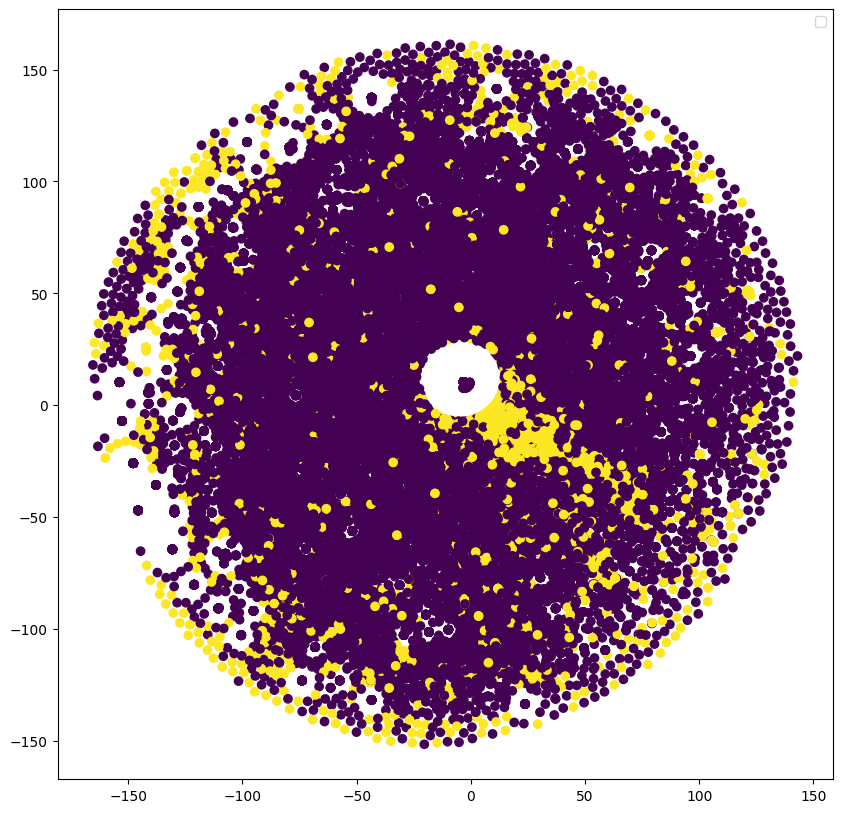

In [ ]:
scatter(X_tsne, Y)

Por las frecuencias , se asume que el morado son tweets que no son de odio y amarillo son tweets de odio. Nos parece que se logra apreciar que hay parte de los amarillos que se encuentra en los extremos del circulo. Esto se debe a que mientras más grandes los valores de un vector, quiere decir que más palabras negativas tiene el tweet, y por el contrario, si el tweet no tenía ningúna palabra negativa, este quedaba reflejado con puros 0 en el espacio de características. Según eso, tiene sentido que los tweets morados estén más cerca del (0,0) y que los amarillos se alejen de este punto. Por otro lado, hay un grupo de tweets amarillos que sí están más cerca del centro del circulo. Pueden ser tweets que si bien contiene alguna palabras de odio, no es el gran porcentaje del tweet. Puede ser un conjunto más dificl de clasificar ya que pueden tener pocas palabras agresivas, pero estas provocan que el tweet sea agresivo igual, y mediante las features utilizadas, eso es dificl de captar.

---



In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## 1.c Probar distintas configuraciones del modelo, incluyendo distintas métricas de distancia


In [ ]:
#reinicimaos los grupos de test y entrenamiento

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_vectorizado, Y, test_size=0.2, random_state=0)

In [ ]:
Y.shape

(31962,)

In [ ]:
X_vectorizado.shape

(31962, 6101)

In [ ]:
from sklearn import metrics

In [ ]:
#modelo base
n_neighbors=[1, 2, 5, 10]
weights=['uniform', 'distance']
metricas=['cosine', 'euclidean', 'manhattan']
Best_accuracy=0
Best_params=""
for metric_ in metricas:
  for weight in weights:
    for k in n_neighbors:
      knn1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric_)
      knn1.fit(X_train, Y_train)
      predicted = knn1.predict(X_test)
      print(f'Configuracion: metric:{metric_}, weight:{weight}, k:{k}')
      print(f'Confusion matrix:\n {metrics.confusion_matrix(Y_test, predicted)}')
      print(f'Accuracy: {metrics.balanced_accuracy_score(Y_test, predicted)}')
      if metrics.balanced_accuracy_score(Y_test, predicted) >Best_accuracy:
        Best_accuracy=metrics.balanced_accuracy_score(Y_test, predicted)
        Best_params=(f'Best Configuracion: metric:{metric_}, weight:{weight}, k:{k}')


Configuracion: metric:cosine, weight:uniform, k:1
Confusion matrix:
 [[5945   40]
 [ 247  161]]
Accuracy: 0.6939622340164135
Configuracion: metric:cosine, weight:uniform, k:2
Confusion matrix:
 [[5980    5]
 [ 326   82]]
Accuracy: 0.6000724851344046
Configuracion: metric:cosine, weight:uniform, k:5
Confusion matrix:
 [[5978    7]
 [ 326   82]]
Accuracy: 0.599905400756794
Configuracion: metric:cosine, weight:uniform, k:10
Confusion matrix:
 [[5983    2]
 [ 344   64]]
Accuracy: 0.5782642881714088
Configuracion: metric:cosine, weight:distance, k:1
Confusion matrix:
 [[5945   40]
 [ 247  161]]
Accuracy: 0.6939622340164135
Configuracion: metric:cosine, weight:distance, k:2
Confusion matrix:
 [[5965   20]
 [ 254  154]]
Accuracy: 0.6870546464199715
Configuracion: metric:cosine, weight:distance, k:5
Confusion matrix:
 [[5978    7]
 [ 268  140]]
Accuracy: 0.670983832129343
Configuracion: metric:cosine, weight:distance, k:10
Confusion matrix:
 [[5983    2]
 [ 281  127]]
Accuracy: 0.6554701705243

In [ ]:
print(Best_accuracy)
print(Best_params)

0.6939622340164135
Best Configuracion: metric:cosine, weight:uniform, k:1


Para combinación de metrica (coseno, euclidiana, manhattan) y pesosde los puntos (uniforme o por inverso de distancia), el mejor k es siempre=1. Y La mejor metrica es coseno (accuracy=0,693), luego euclidian (accuracy=0,686) y luego manhattan (accuracy=0,667). Esto para ambos tipos de weights. Esto puede ser debido a que coseno puede ser capaz de medir mejor la distancia más corta entre vectores similares

# Pregunta 2: SpaceShip Titanic

##En un set de datos ni fácil ni difícil:

### 1) Entrenar diversos modelos de arboles, 2) Encontrar las variables más importantes en cada uno de ellos

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

https://www.kaggle.com/competitions/spaceship-titanic/

## Variables

* PassengerId A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df.describe(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [ ]:
df["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [ ]:
def facet(x):
    facet = sns.FacetGrid(df, hue="Transported", aspect=4)
    facet.map(sns.kdeplot, x, shade=True)
    facet.set(xlim=(0, 5000))
    plt.show()

EDA del set de datos

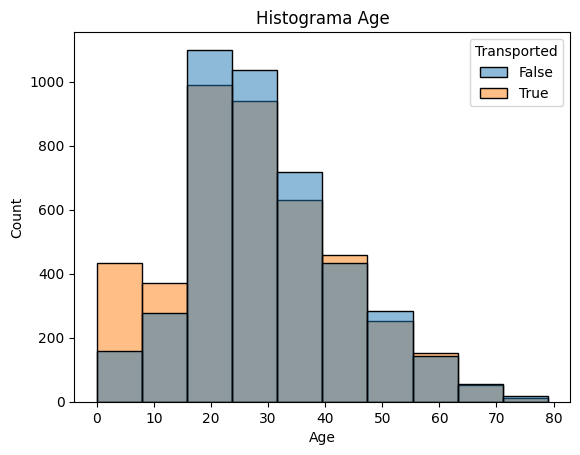

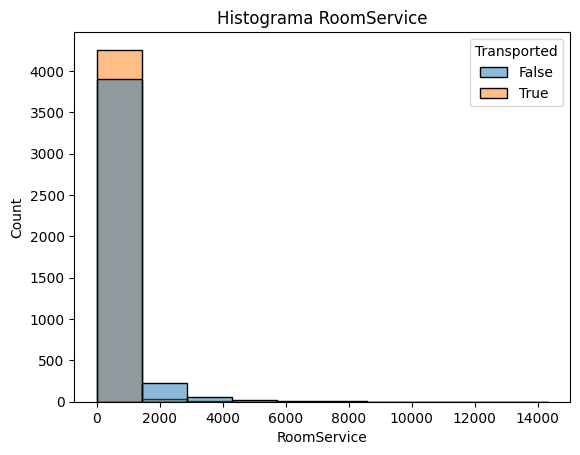

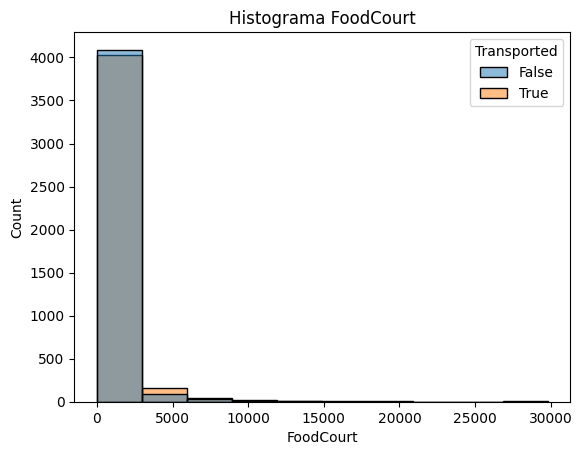

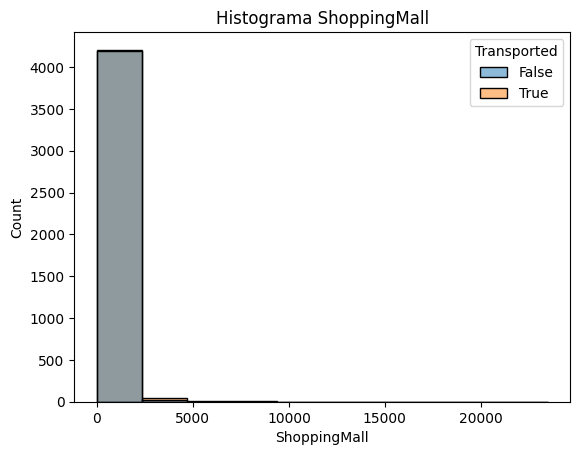

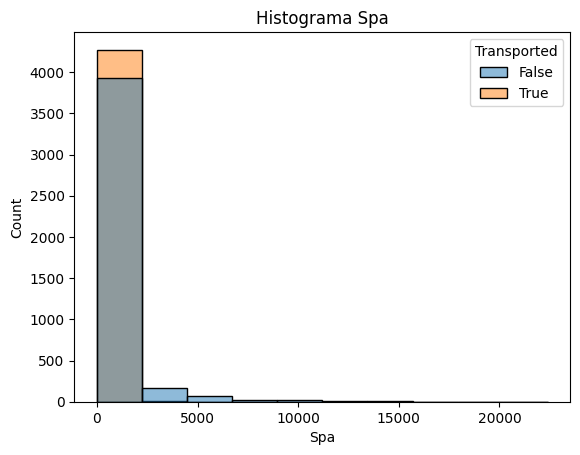

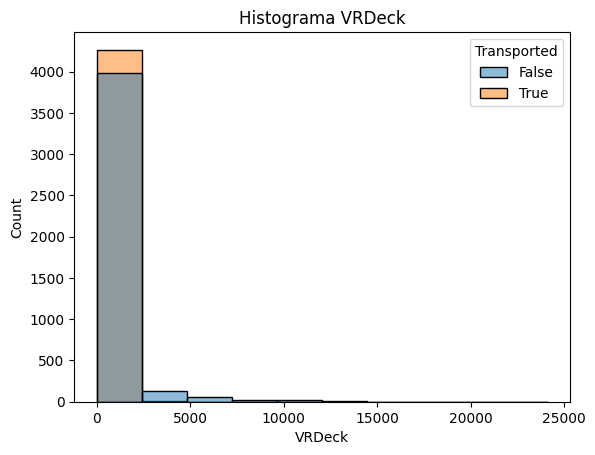

In [ ]:
for i in df.select_dtypes('float64').columns:
   sns.histplot(data=df, x=i, hue = 'Transported', bins = 10)
   plt.title(f"Histograma {i}")
   plt.show()

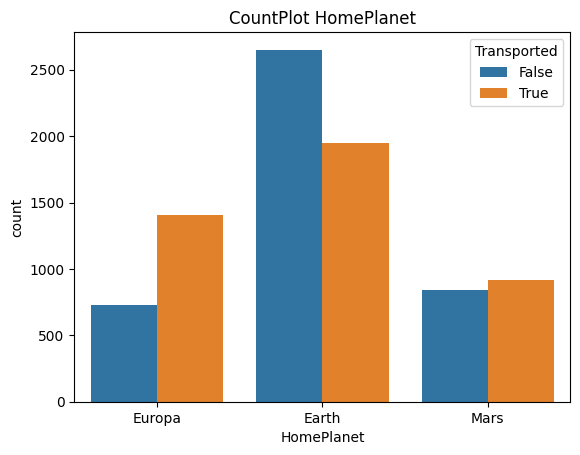

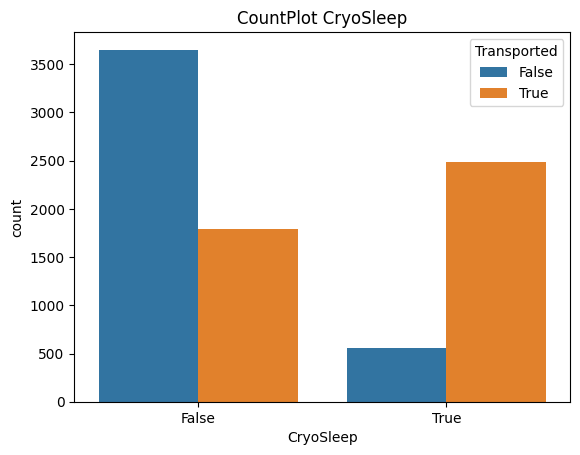

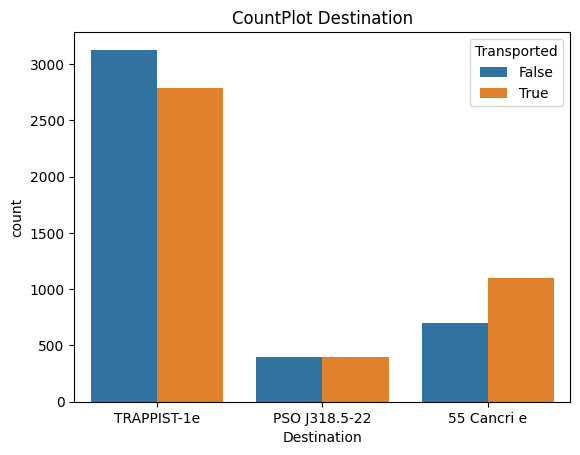

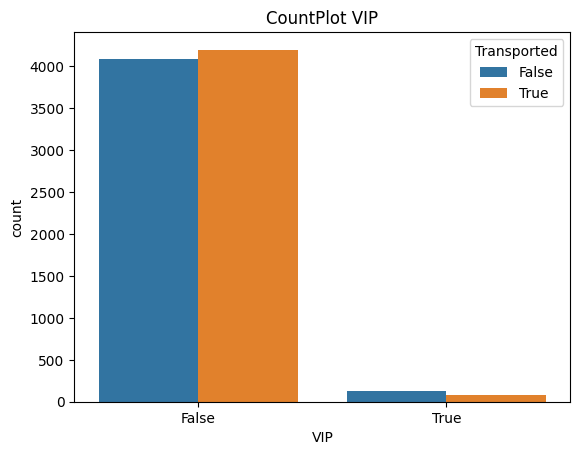

In [ ]:
for i in df.select_dtypes('object').columns:
  if i not in ("Cabin", "Name", "PassengerId"):
    sns.countplot(data=df, x=i, hue = 'Transported')
    plt.title(f"CountPlot {i}")
    plt.show()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [ ]:
df.replace(False, value=0, inplace = True)
df.replace(True, value=1, inplace = True)

In [ ]:
df["Cabin_"]  = df["Cabin"].apply(lambda x: str(x).split("/"))
df["Deck"] = df["Cabin_"].apply(lambda x: x[0])
#df["Num"] = df["Cabin_"].apply(lambda x: x[1])
df["Side"] = df["Cabin_"].apply(lambda x: x[2])

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_,Deck,Side
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,"[B, 0, P]",B,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,"[F, 0, S]",F,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,"[A, 0, S]",A,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,"[A, 0, S]",A,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,"[F, 1, S]",F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,"[A, 98, P]",A,P
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,"[G, 1499, S]",G,S
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,"[G, 1500, S]",G,S
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,"[E, 608, S]",E,S


In [ ]:
df = df.drop(columns=["Name", "Cabin", "PassengerId","Cabin_"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6606 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    6606 non-null   object 
 1   CryoSleep     6606 non-null   int64  
 2   Destination   6606 non-null   object 
 3   Age           6606 non-null   float64
 4   VIP           6606 non-null   int64  
 5   RoomService   6606 non-null   float64
 6   FoodCourt     6606 non-null   float64
 7   ShoppingMall  6606 non-null   float64
 8   Spa           6606 non-null   float64
 9   VRDeck        6606 non-null   float64
 10  Transported   6606 non-null   int64  
 11  Deck          6606 non-null   object 
 12  Side          6606 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 722.5+ KB


In [ ]:
for i in df.select_dtypes('object').columns:
  df2 = pd.get_dummies(df[i])
  df = pd.concat([df, df2], axis = 1)
  df.drop(columns = [i], inplace=True)

In [ ]:
df.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Earth', 'Europa', 'Mars',
       '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'A', 'B', 'C', 'D', 'E',
       'F', 'G', 'T', 'P', 'S'],
      dtype='object')

Modelos

In [ ]:
X = df.drop(columns=["Transported"])
y = df["Transported"]
X.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Earth', 'Europa', 'Mars', '55 Cancri e',
       'PSO J318.5-22', 'TRAPPIST-1e', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T',
       'P', 'S'],
      dtype='object')

## 2.a) Entrene diversos modelos de arboles de decision, modicando sus hiperparametros

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
tree_ = DecisionTreeClassifier()
tree_.fit(X_train, y_train)
y_pred = tree_.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[596 217]
 [204 635]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       813
           1       0.75      0.76      0.75       839

    accuracy                           0.75      1652
   macro avg       0.75      0.74      0.75      1652
weighted avg       0.75      0.75      0.75      1652



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth":[1, 3, 4, 5, 7, 10], "criterion":["gini", "entropy"]}
tree = DecisionTreeClassifier()
model = GridSearchCV(tree, parameters, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[597 216]
 [128 711]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.78       813
           1       0.77      0.85      0.81       839

    accuracy                           0.79      1652
   macro avg       0.80      0.79      0.79      1652
weighted avg       0.79      0.79      0.79      1652



In [ ]:
print(model.best_params_)


{'criterion': 'entropy', 'max_depth': 7}


In [ ]:
tree1 = DecisionTreeClassifier(max_depth=7, criterion='entropy', splitter='best', random_state = 42)
tree1.fit(X_train, y_train)
y_pred = tree1.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[597 216]
 [128 711]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.78       813
           1       0.77      0.85      0.81       839

    accuracy                           0.79      1652
   macro avg       0.80      0.79      0.79      1652
weighted avg       0.79      0.79      0.79      1652



In [ ]:
######## spliter random
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
tree2 = DecisionTreeClassifier(max_depth=7, criterion='entropy', splitter='random', random_state = 42)
tree2.fit(X_train, y_train)
y_pred = tree2.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[704 109]
 [253 586]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       813
           1       0.84      0.70      0.76       839

    accuracy                           0.78      1652
   macro avg       0.79      0.78      0.78      1652
weighted avg       0.79      0.78      0.78      1652



In [ ]:
######## mejor modelo con gridsearch más splitter y min_samples_leaf
tree3 = DecisionTreeClassifier(max_depth=7, criterion='entropy', splitter='best', random_state = 42, min_samples_leaf = 10)
tree3.fit(X_train, y_train)
y_pred = tree3.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[602 211]
 [131 708]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       813
           1       0.77      0.84      0.81       839

    accuracy                           0.79      1652
   macro avg       0.80      0.79      0.79      1652
weighted avg       0.80      0.79      0.79      1652



## 2.b1) Para cada uno de los modelos entrenados, encuentre las variables mas relevantes para la clasicacion. Compare
las encontradas por cada modelo y discuta sobre tanto sobre la explicabilidad que estas proveen (si coincide
con lo que uno esperaRa), como sobre la existencia de un conjunto de variables que son relevantes en todos
los modelos.

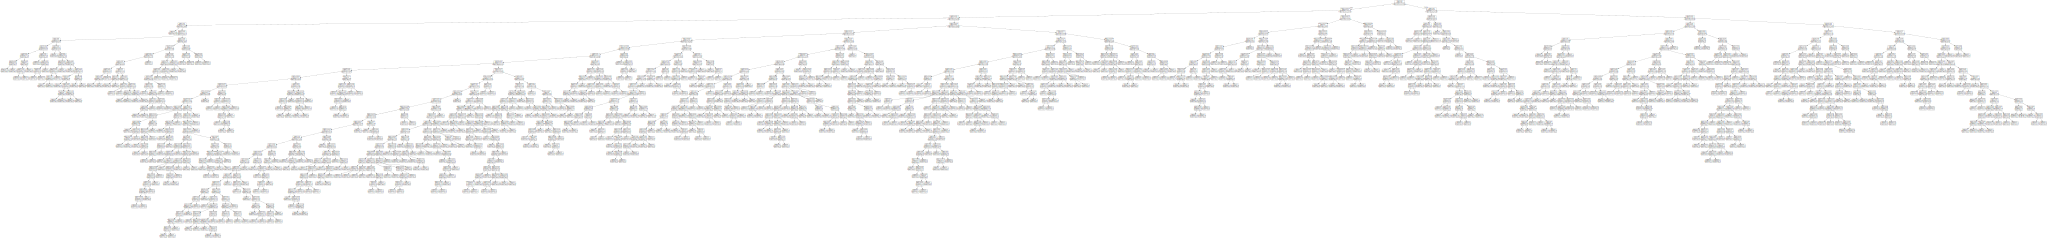

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree_, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render(filename='./tree_')

'tree_.pdf'

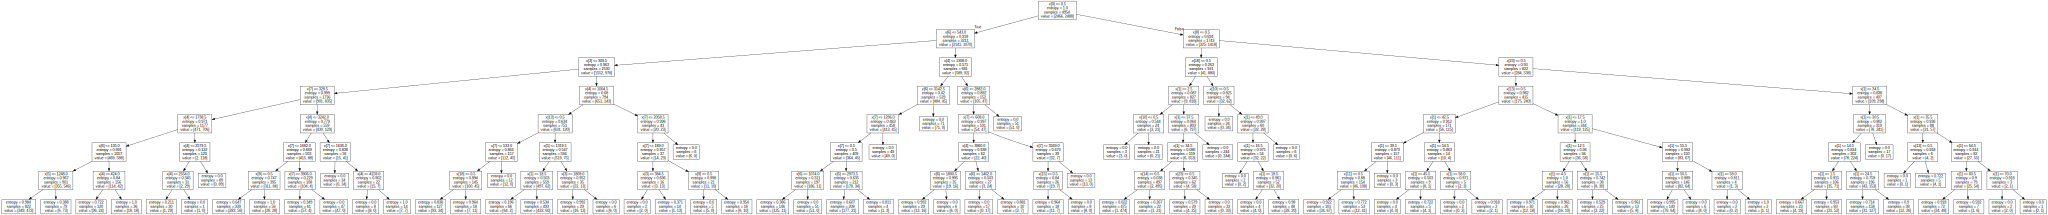

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree1, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render(filename='./tree1')

'tree1.pdf'

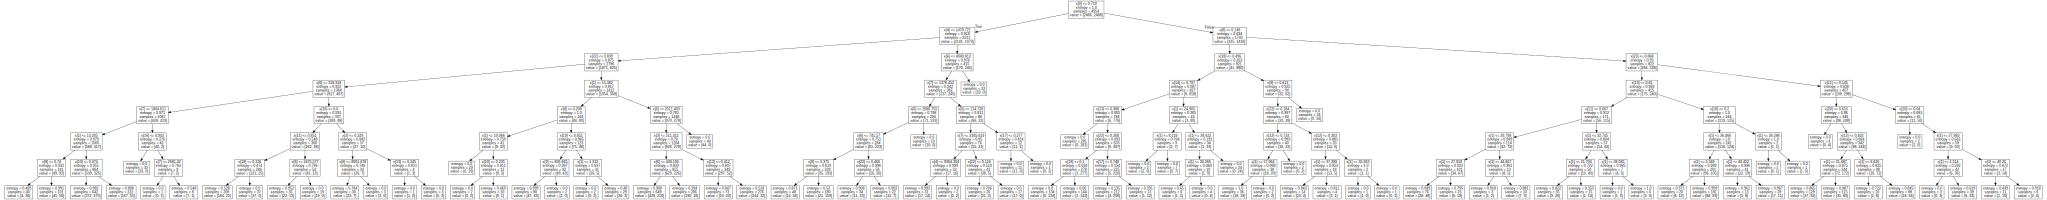

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree2, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render(filename='./tree2')

'tree2.pdf'

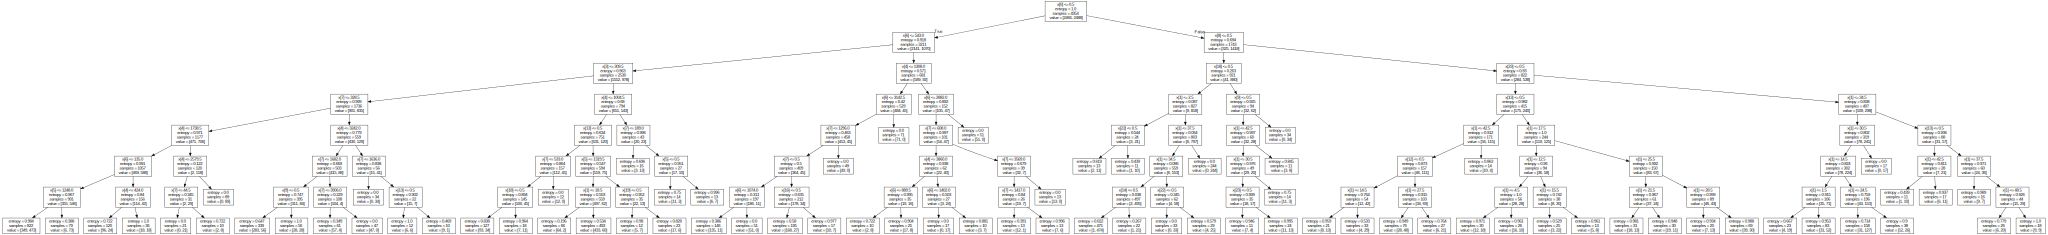

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(tree3, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render(filename='./tree3')

'tree3.pdf'

## 2.b2) Variables más relevantes por modelo en nivel 1 y 2 del árbol.
Se decidio analizar los niveles 1 y 2 del árbol para acotar el ánalisis porque incluir más niveles extendería en demasía la cantidad de variables a analizar.

Modelo: Tree_ (Configuración Default).

*   CryoSleep
  *   FoodCourt
  *   Earth
  
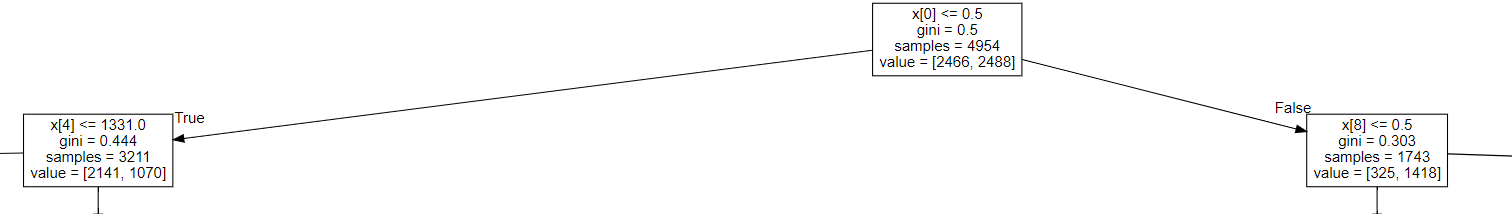

Modelo: Tree1 Mejores parámetros de GridSearchCV(criterion = 'entropy', max_depth=7, splitter = 'best')

*   CryoSleep
  *   Spa
  *   Earth

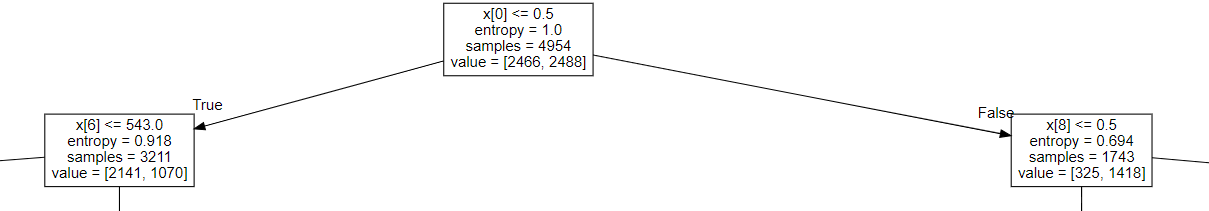

Modelo: Tree2 Modelo entrenado con los siguientes parámetros: (criterion = 'entropy', max_depth=7, splitter = 'random')

*   CryoSleep
  *   FoodCourt
  *   Earth

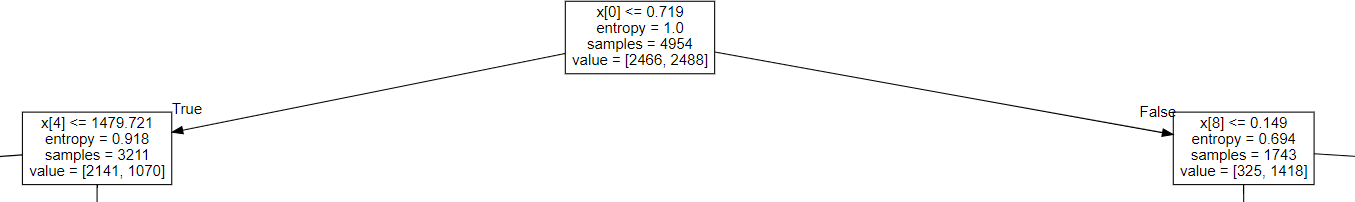


Modelo: Tree3 Modelo entrenado con los siguientes parámetros:(criterion = 'entropy', max_depth=7, splitter = 'best', min_samples_leaf = 10)

*   CryoSleep
  *   Spa
  *   Earth

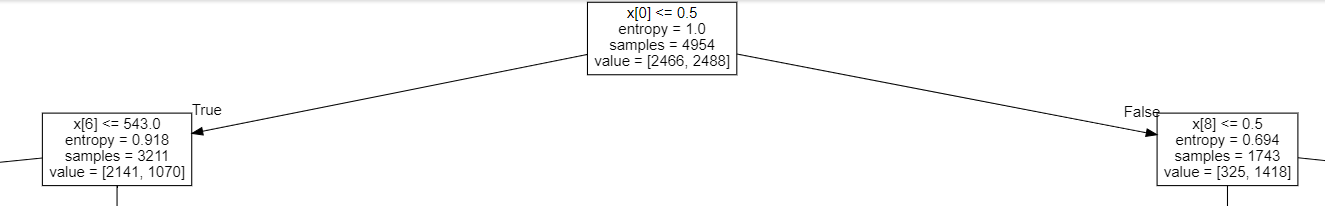





* En base al EDA realizado inicialmente, en las variables categoricas la que más cortaba a primera vista era CryoSleep, los pasajeros con CryoSleep = True(1) tenían mucha mayor proporción de transportados que los CryoSleep = False(0), por ende se esperaba que fuera la variable que entregara mayor información en los árboles.

* En la variable homeplanet los que venían del planeta tierra tenían una mayor diferenciación entre la cantidad de transportados y no transportados. Por lo que también hace sentido que este dentro de los primeros niveles.

* En las variables SPA y CoudFourt no se veía una gran separación entre los pasajeros que eran transportados y no, por lo que parece sorpresivo que estas variables aparezcan en los primeros niveles del árbol.

Se observa que existe un grupo de variables que son relevantes en todos los modelos desarrollados (CryoSleep - Earth) y por lo tanto se reafirma la transversalidad de su importancia.
